### Choose randomly a wikipedia page with a table from the "Category: Lists of websites"  https://en.wikipedia.org/wiki/Category:Lists_of_websites, derive a pandas dataframe and a bipartite graph as in the following example:

In [1]:
import random
#import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import wikipedia as wp
import requests
#import csv
#import re
#import urllib2
#from datetime import datetime
#import os
#import sys
import operator
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings("ignore")

In [3]:
# If instead of randomly selecting a List Wikipedia page, you want to
# start with one of your coice, insert its URL as below (uncommenting it):

url='https://en.wikipedia.org/wiki/List_of_social_networking_websites'

In [4]:
df=pd.read_html(url,header=0)[0]
df

,Name,Description/focus,Date launched,Registered users,Registration,Global Alexa page ranking
0,Academia.edu,Social networking site for academics/researchers,September 2008,"18,000,000[1]",Open,824[2]
1,About.me,Social networking site,October 2009,"5,000,000[3]",Open,1447
2,aNobii,Books,2006,NaN,Open,"26,939[4]"
3,AsianAvenue,A social network for the Asian American community,1997,NaN,Open,"170,384[5]"
4,aSmallWorld,European jet set and social elite worldwide,March 2004,"550,000[6]",Invite-only,"580,060[7]"
5,Athlinks,"Running, swimming",2001,"139,458[8]",Open,"69,170[9]"
6,Audimated.com,Independent music,2010,NaN,Open,"656,507[10]"
7,Biip.no,Norwegian community,1 June 2005,"430,000[11]",Requires Norwegian phone number,"81,916[12]"
8,BlackPlanet,Black Americans,1 September 1999,"20,000,000[13]",Open,"7,193[14]"
9,Busuu,Language learning community (headquartered in ...,16 May 2008,"12,000,000[15]",Open,"4,976[16]"


In [8]:
# # If there are unwanted symbols in the dataframe, remove them as follows:

df = df.replace('\n','', regex=True) 
df = df.replace(r'\[[^()]*\]','', regex=True) 
df = df.replace(r'.*♠',' ', regex=True) 
#nco=df.Name.map(lambda x: x.replace('*','')).tolist()
#df['Name']=nco
#ncoo=df['Alexa global ranking'].map(lambda x: x.encode('ascii', 'ignore').replace(' †','')).tolist()
#df['Alexa global ranking']=ncoo
print len(df)
df

188


,Name,Description/focus,Date launched,Registered users,Registration,Global Alexa page ranking
0,Academia.edu,Social networking site for academics/researchers,September 2008,"18,000,000",Open,824
1,About.me,Social networking site,October 2009,"5,000,000",Open,1447
2,aNobii,Books,2006,NaN,Open,"26,939"
3,AsianAvenue,A social network for the Asian American community,1997,NaN,Open,"170,384"
4,aSmallWorld,European jet set and social elite worldwide,March 2004,"550,000",Invite-only,"580,060"
5,Athlinks,"Running, swimming",2001,"139,458",Open,"69,170"
6,Audimated.com,Independent music,2010,NaN,Open,"656,507"
7,Biip.no,Norwegian community,1 June 2005,"430,000",Requires Norwegian phone number,"81,916"
8,BlackPlanet,Black Americans,1 September 1999,"20,000,000",Open,"7,193"
9,Busuu,Language learning community (headquartered in ...,16 May 2008,"12,000,000",Open,"4,976"


In [9]:
cc={}
Name=list(df.columns)
for c in Name:
    if c!=Name[0]:
        cc[c]=len(df[c].unique())
v0=min(cc.values())
mc=[]
for k,v in cc.items():
    if v==v0:
        mc.append(k)
mc
nm=random.choice(mc)
k=Name.index(nm)
print df.columns[0],len(df[df.columns[0]].unique())
print Name[k],cc[Name[k]]

Name 188
Registration 37


In [10]:
eds=[]
for i in range(len(df)):
    a=df.iloc[i][Name[0]] 
    b=df.iloc[i][Name[k]] 
    eds.append((a,b))
print len(eds),len(set(eds))

188 188


In [12]:
H=nx.Graph()
H.add_edges_from(eds)
rem=[n for n in H.nodes() if n=='']
H.remove_nodes_from(rem)
dc0=Name[0] #+"s"
dc1=Name[k] #+"es"
print "The graph of %s vs. %s has %i nodes and %i edges" %(dc0,dc1,len(H.nodes()),len(H.edges()))
ca=[n for n in H.nodes() if n in df[Name[0]].tolist()]
so=[n for n in H.nodes() if n not in df[Name[0]].tolist()]
nt=len(ca)
nh=len(so)
print "The %i nodes of this graph are:" %len(H.nodes())
print "%i %s and %i %s" %(nt,dc0,nh,dc1)
if nx.is_bipartite(H)==True:
    print "This graph is bipartite"
else:
    print "This graph is not bipartite"
if nx.is_connected(H)==True:
    print "This graph is connected"
else:
    print "This graph is not connected and has", nx.number_connected_components(H), "connected components"
Hl = sorted(nx.connected_component_subgraphs(H), key = len, reverse=True)
Hc=H.subgraph(Hl[0])
Hl[0].nodes()
print 'The largest connected component has:'
# for n in Hc.nodes():
#     if type(n)==str:
#         n.encode('ascii', 'ignore')
Hcnodes=[n.encode('ascii', 'ignore') for n in Hc.nodes() if type(n)==str]
Hcedges=[]
for e in Hc.edges():
    t=[]
    if type(e[0])==str:
        t.append(e[0].encode('ascii', 'ignore'))
    if type(e[1])==str:
        t.append(e[1].encode('ascii', 'ignore'))
    Hcedges.append(tuple(t))
print "%i nodes and %i edges" %(len(Hcnodes), len(Hcedges))

The graph of Name vs. Registration has 225 nodes and 188 edges
The 225 nodes of this graph are:
188 Name and 37 Registration
This graph is bipartite
This graph is not connected and has 37 connected components
The largest connected component has:
117 nodes and 116 edges


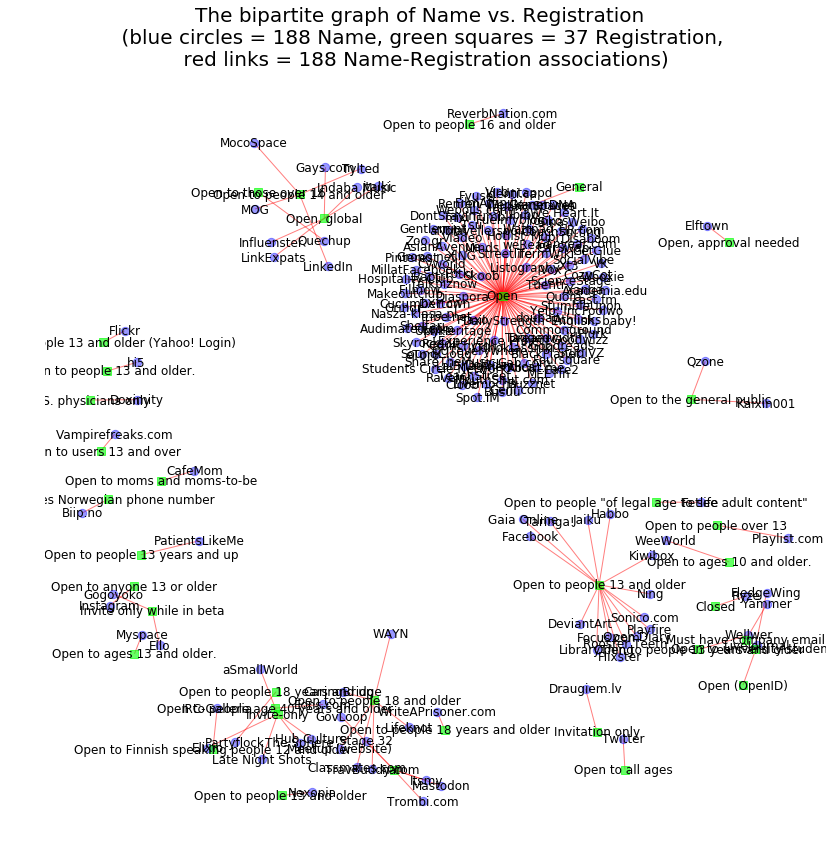

In [13]:
pos=nx.spring_layout(H,0.18)
labels={}
for i in H.nodes():
    labels[i]=i
#     if i in ca:
#         labels[i]=i
#     else:
#         labels[i]=''
# for i in H.nodes():
#     if H.degree(i)>1:
#         labels[i]=i
#     else:
#         labels[i]='' #i
fig = plt.figure(figsize=(14,14))
nx.draw_networkx_nodes(H,pos=pos,nodelist=ca,node_color='b',node_size=70,font_size=20,alpha=0.4);
nx.draw_networkx_nodes(H,pos=pos,nodelist=so,node_color='lime',node_shape="s",node_size=60,font_size=20,alpha=0.6);
nx.draw_networkx_edges(H,pos=pos,edge_color='r',alpha=0.5); #width=edgewidth,
nx.draw_networkx_labels(H,pos=pos,labels=labels,font_size=12);
sst="The bipartite graph of %s vs. %s \n (blue circles = %i %s, green squares = %i %s, \n red links = %i %s-%s associations)" %(dc0,dc1,nt,dc0,nh,dc1,len(H.edges()),dc0,dc1)
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');

In [14]:
# Degrees of Names > 1

x={}
for n in H.nodes():
    if n in so:
        x[n]=H.degree(n)
print max(x.values())
xx={i:j for i,j in x.items() if j>1}
if len(xx)>0:
    sorted_xx = sorted(xx.items(), key=operator.itemgetter(1),reverse=True)
    n0=sorted_xx[0][0]
else:
    sorted_xx=xx
    n0=random.choice(x.items())
n0

116


'Open'

In [15]:
Ha=H.subgraph(ca)
Hb=H.subgraph(so)
posb=nx.circular_layout(Hb)
posb[n0]=(0,0)
posaa=nx.circular_layout(Ha)
posa=nx.spring_layout(Ha,scale=1,k=4.7)
d=0.8 #1/0.7 #1.3 #1.3 #3
for k,v in posa.items(): 
    v[0] = v[0]*d
    v[1] = v[1]*d
for k,v in posaa.items(): 
    v[0] = v[0]*d
    v[1] = v[1]*d
posAll=dict(posb.items()+posa.items()+[(k,posb[k]+posa[k]) for k in set(posa)&set(posb)])
posAlla=dict(posb.items()+posaa.items()+[(k,posb[k]+posaa[k]) for k in set(posaa)&set(posb)])

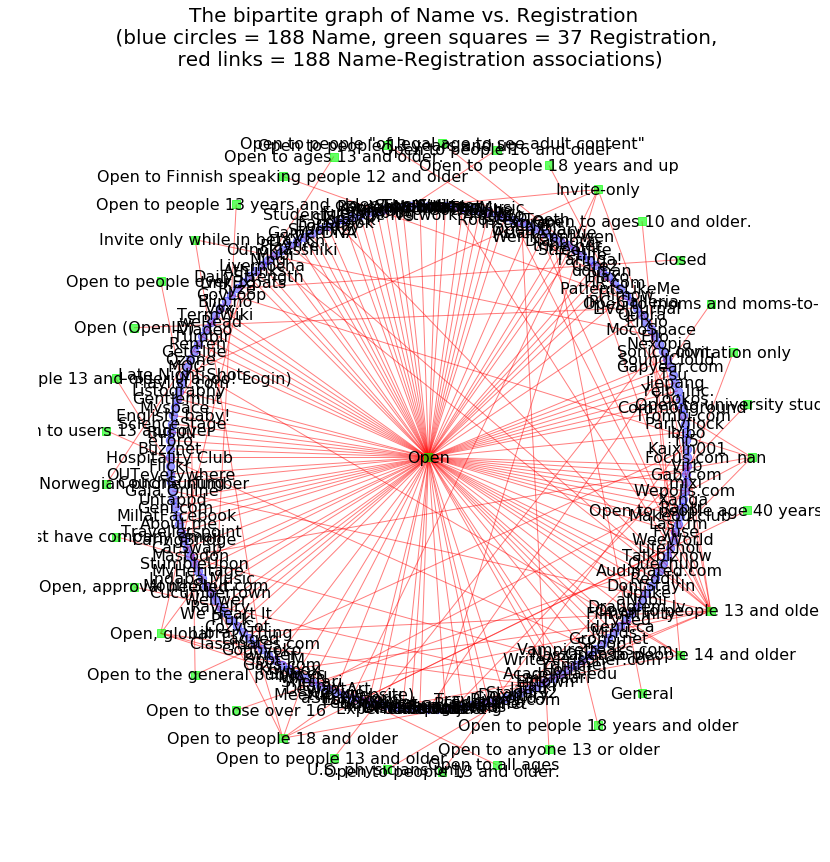

In [16]:
labels={}
for i in H.nodes():
    labels[i]=i
#     if i in ca:
#         labels[i]=i
#     else:
#         labels[i]=''
#     if H.degree(i)>1:
#         labels[i]=i
#     else:
#         labels[i]='' #i
fig = plt.figure(figsize=(14,14))
# fig = plt.figure(figsize=(20,20))
# ax = fig.add_subplot(111)
nx.draw_networkx_nodes(Ha,pos=posaa,nodelist=ca,node_color='b',node_size=70,font_size=20,alpha=0.4);
nx.draw_networkx_nodes(Hb,pos=posb,nodelist=so,node_color='lime',node_shape="s",node_size=60,font_size=20,alpha=0.6);
nx.draw_networkx_edges(H,pos=posAlla,edge_color='r',alpha=0.5);
# nx.draw_networkx_edges(H,pos=posAlla,edgelist=dict(Counter(mee)).keys(),alpha=0.6,edge_color='g',width=edgewidth);
nx.draw_networkx_labels(H,pos=posAlla,labels=labels,font_size=16);
sst="The bipartite graph of %s vs. %s \n (blue circles = %i %s, green squares = %i %s, \n red links = %i %s-%s associations)" %(dc0,dc1,nt,dc0,nh,dc1,len(H.edges()),dc0,dc1)
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');
plt.margins(x=0.1, y=0.1) 

### Manual Change of the Second Column

In [17]:
# Change the second column (the second mode of the bipartite graph)

clm="Description/focus"

k=Name.index(clm)
print df.columns[0],len(df[df.columns[0]].unique())
print Name[k],cc[Name[k]]

Name 188
Description/focus 173


In [18]:
eds=[]
for i in range(len(df)):
    a=df.iloc[i][Name[0]] 
    b=df.iloc[i][Name[k]] 
    eds.append((a,b))
print len(eds),len(set(eds))

188 188


In [19]:
H=nx.Graph()
H.add_edges_from(eds)
rem=[n for n in H.nodes() if n=='']
H.remove_nodes_from(rem)
dc0=Name[0] #+"s"
dc1=Name[k] #+"es"
print "The graph of %s vs. %s has %i nodes and %i edges" %(dc0,dc1,len(H.nodes()),len(H.edges()))
ca=[n for n in H.nodes() if n in df[Name[0]].tolist()]
so=[n for n in H.nodes() if n not in df[Name[0]].tolist()]
nt=len(ca)
nh=len(so)
print "The %i nodes of this graph are:" %len(H.nodes())
print "%i %s and %i %s" %(nt,dc0,nh,dc1)
if nx.is_bipartite(H)==True:
    print "This graph is bipartite"
else:
    print "This graph is not bipartite"
if nx.is_connected(H)==True:
    print "This graph is connected"
else:
    print "This graph is not connected and has", nx.number_connected_components(H), "connected components"
Hl = sorted(nx.connected_component_subgraphs(H), key = len, reverse=True)
Hc=H.subgraph(Hl[0])
print 'The largest connected component has:'
print "%i nodes and %i edges" %(len(Hc.nodes()), len(Hc.edges()))

The graph of Name vs. Description/focus has 361 nodes and 188 edges
The 361 nodes of this graph are:
188 Name and 173 Description/focus
This graph is bipartite
This graph is not connected and has 173 connected components
The largest connected component has:
9 nodes and 8 edges


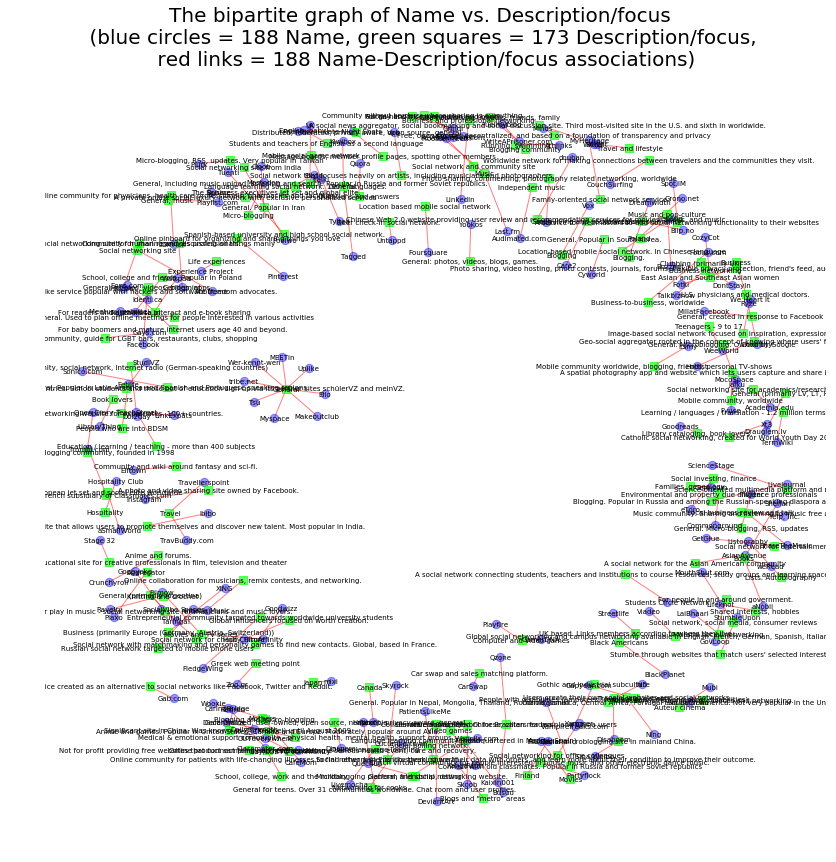

In [24]:
pos=nx.spring_layout(H,0.18)
labels={}
for i in H.nodes():
    labels[i]=i
#     if i in ca:
#         labels[i]=i
#     else:
#         labels[i]=''
# for i in H.nodes():
#     if H.degree(i)>1:
#         labels[i]=i
#     else:
#         labels[i]='' #i
fig = plt.figure(figsize=(14,14))
nx.draw_networkx_nodes(H,pos=pos,nodelist=ca,node_color='b',node_size=70,font_size=20,alpha=0.4);
nx.draw_networkx_nodes(H,pos=pos,nodelist=so,node_color='lime',node_shape="s",node_size=60,font_size=20,alpha=0.6);
nx.draw_networkx_edges(H,pos=pos,edge_color='r',alpha=0.5); #width=edgewidth,
nx.draw_networkx_labels(H,pos=pos,labels=labels,font_size=7);#change the font size to make readable
sst="The bipartite graph of %s vs. %s \n (blue circles = %i %s, green squares = %i %s, \n red links = %i %s-%s associations)" %(dc0,dc1,nt,dc0,nh,dc1,len(H.edges()),dc0,dc1)
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');

In [21]:
# Degrees of Names > 1

x={}
for n in H.nodes():
    if n in so:
        x[n]=H.degree(n)
print max(x.values())
xx={i:j for i,j in x.items() if j>1}
if len(xx)>0:
    sorted_xx = sorted(xx.items(), key=operator.itemgetter(1),reverse=True)
    n0=sorted_xx[0][0]
else:
    sorted_xx=xx
    n0=random.choice(x.items())
n0

8


'General'

In [22]:
Ha=H.subgraph(ca)
Hb=H.subgraph(so)
posb=nx.circular_layout(Hb)
posb[n0]=(0,0)
posaa=nx.circular_layout(Ha)
posa=nx.spring_layout(Ha,scale=1,k=4.7)
d=0.8 #1/0.7 #1.3 #1.3 #3
for k,v in posa.items(): 
    v[0] = v[0]*d
    v[1] = v[1]*d
for k,v in posaa.items(): 
    v[0] = v[0]*d
    v[1] = v[1]*d
posAll=dict(posb.items()+posa.items()+[(k,posb[k]+posa[k]) for k in set(posa)&set(posb)])
posAlla=dict(posb.items()+posaa.items()+[(k,posb[k]+posaa[k]) for k in set(posaa)&set(posb)])

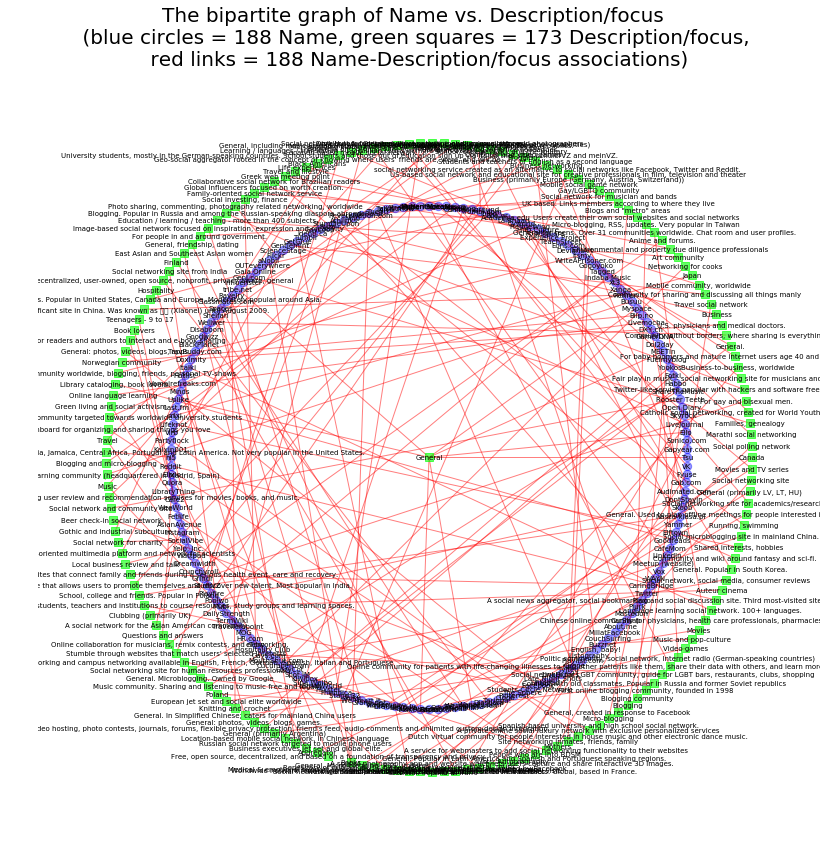

In [25]:
labels={}
for i in H.nodes():
    labels[i]=i
#     if i in ca:
#         labels[i]=i
#     else:
#         labels[i]=''
#     if H.degree(i)>1:
#         labels[i]=i
#     else:
#         labels[i]='' #i
fig = plt.figure(figsize=(14,14))
# fig = plt.figure(figsize=(20,20))
# ax = fig.add_subplot(111)
nx.draw_networkx_nodes(Ha,pos=posaa,nodelist=ca,node_color='b',node_size=70,font_size=20,alpha=0.4);
nx.draw_networkx_nodes(Hb,pos=posb,nodelist=so,node_color='lime',node_shape="s",node_size=60,font_size=20,alpha=0.6);
nx.draw_networkx_edges(H,pos=posAlla,edge_color='r',alpha=0.5);
# nx.draw_networkx_edges(H,pos=posAlla,edgelist=dict(Counter(mee)).keys(),alpha=0.6,edge_color='g',width=edgewidth);
nx.draw_networkx_labels(H,pos=posAlla,labels=labels,font_size=7); #change font size to make readable
sst="The bipartite graph of %s vs. %s \n (blue circles = %i %s, green squares = %i %s, \n red links = %i %s-%s associations)" %(dc0,dc1,nt,dc0,nh,dc1,len(H.edges()),dc0,dc1)
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');
plt.margins(x=0.1, y=0.1) 